In [3]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [4]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [5]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


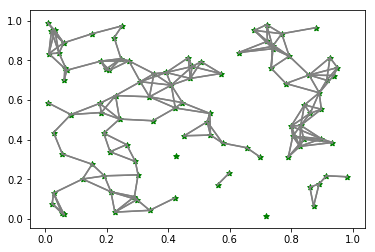

In [6]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,8,9,14,31,35,37,39,87,55,26,71,3,22,45,53,90,16,19,97,2,17,15,21,50,92,28,88
1,86,44,76,82,69,72,74,94,43,66,29,68,60,84,40,51,63,24,89,95,25,56,41,77,30,85,58,10,33,34,57,83,27,32,42,46,23,64,91,12,20,5,70,7,61,81,78,52,96,6,36,48,59,79,99,11,38,47,80,98,49,93
4,54
13
18
62,65,67,73,75


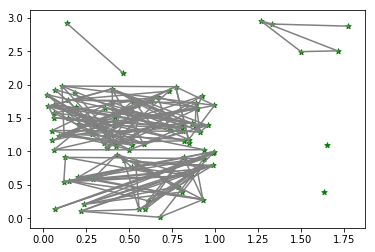

In [7]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

In [ ]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")